In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [56]:
df1 = pd.read_csv("E:\\github_clone\\human-activity-recognition\\data\\compressed_data_1.csv")
df2 = pd.read_csv("E:\\github_clone\\human-activity-recognition\\data\\compressed_activity_data.csv")
df = pd.concat([df1, df2], ignore_index=True)

In [57]:
df.shape

(235, 25)

# Before Data Augmentation

In [58]:
df.head()

,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,acc_y_std,acc_z_std,acc_x_max,acc_y_max,acc_z_max,acc_x_min,...,gyro_x_std,gyro_y_std,gyro_z_std,gyro_x_max,gyro_y_max,gyro_z_max,gyro_x_min,gyro_y_min,gyro_z_min,activity
0,0.807947,0.605079,-0.078861,0.340053,0.290071,0.311237,2.390305,2.311157,1.070602,-0.618698,...,1.079115,1.964364,0.702070,3.388801,6.080116,2.908103,-3.902423,-6.649853,-2.179657,downstairs
1,0.807947,0.605079,-0.078861,0.340053,0.290071,0.311237,2.390305,2.311157,1.070602,-0.618698,...,1.079115,1.964364,0.702070,3.388801,6.080116,2.908103,-3.902423,-6.649853,-2.179657,downstairs
2,-0.272239,1.026517,-0.092339,0.724730,1.149340,0.687125,2.807007,5.363983,2.053986,-4.010849,...,3.057738,2.963132,1.878728,6.223940,6.919963,4.481204,-9.524870,-11.997552,-6.496084,jogging
3,0.281158,0.358120,-0.898597,0.041880,0.036871,0.016954,0.527451,0.507019,-0.783539,0.040497,...,0.052375,0.033811,0.049603,0.591255,0.402753,0.714474,-0.736353,-0.333014,-0.590174,sitting
4,0.079849,1.003429,0.080250,0.071522,0.018363,0.053207,0.378998,1.373367,0.306076,-0.364960,...,0.087463,0.173388,0.062323,1.544325,1.254333,0.900430,-1.158551,-1.909183,-0.516644,standing


In [59]:
df.describe()

,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,acc_y_std,acc_z_std,acc_x_max,acc_y_max,acc_z_max,acc_x_min,...,gyro_z_mean,gyro_x_std,gyro_y_std,gyro_z_std,gyro_x_max,gyro_y_max,gyro_z_max,gyro_x_min,gyro_y_min,gyro_z_min
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.025152,0.148019,-0.005493,0.443269,0.499182,0.385151,2.817989,2.653599,2.485863,-2.696287,...,0.004226,1.192334,1.272931,1.131040,3.850725,6.260713,3.831993,-3.844800,-5.986150,-3.813718
std,0.290252,0.923694,0.280902,0.304048,0.366460,0.240772,2.424104,2.054564,2.287857,2.409808,...,0.062185,0.809067,0.772303,0.834752,2.400197,4.047149,2.791044,2.374599,4.396835,2.669613
min,-0.993609,-1.623560,-1.002952,0.010169,0.007581,0.004033,-0.492203,-0.085495,-0.933777,-8.053955,...,-0.158835,0.006634,0.010953,0.007541,0.058239,0.163751,0.069228,-17.369271,-31.039573,-12.148050
25%,-0.183276,-0.931993,-0.102736,0.210234,0.321643,0.234157,0.832115,0.971809,0.871605,-4.387527,...,-0.029637,0.599735,0.887641,0.493371,2.228133,3.294128,1.718606,-4.964536,-8.021837,-5.655481
50%,0.011534,0.622501,0.016522,0.428452,0.474799,0.401242,2.161011,2.227661,1.955566,-1.923004,...,0.003155,1.240070,1.364614,1.099979,3.665947,6.296464,3.512496,-3.902423,-5.276049,-3.456513
75%,0.222477,0.987828,0.130170,0.686157,0.620631,0.516364,3.969246,4.155304,3.640664,-0.780456,...,0.033148,1.758069,1.667747,1.731127,5.212660,8.473750,5.430288,-2.234133,-3.043658,-1.785829
max,0.878188,1.218881,0.880593,1.327077,1.742646,1.317322,8.002914,7.980240,8.406799,0.637543,...,0.184575,3.712343,3.693231,4.784369,12.729441,22.682533,14.414091,-0.162084,-0.184731,-0.070852


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x_mean   235 non-null    float64
 1   acc_y_mean   235 non-null    float64
 2   acc_z_mean   235 non-null    float64
 3   acc_x_std    235 non-null    float64
 4   acc_y_std    235 non-null    float64
 5   acc_z_std    235 non-null    float64
 6   acc_x_max    235 non-null    float64
 7   acc_y_max    235 non-null    float64
 8   acc_z_max    235 non-null    float64
 9   acc_x_min    235 non-null    float64
 10  acc_y_min    235 non-null    float64
 11  acc_z_min    235 non-null    float64
 12  gyro_x_mean  235 non-null    float64
 13  gyro_y_mean  235 non-null    float64
 14  gyro_z_mean  235 non-null    float64
 15  gyro_x_std   235 non-null    float64
 16  gyro_y_std   235 non-null    float64
 17  gyro_z_std   235 non-null    float64
 18  gyro_x_max   235 non-null    float64
 19  gyro_y_m

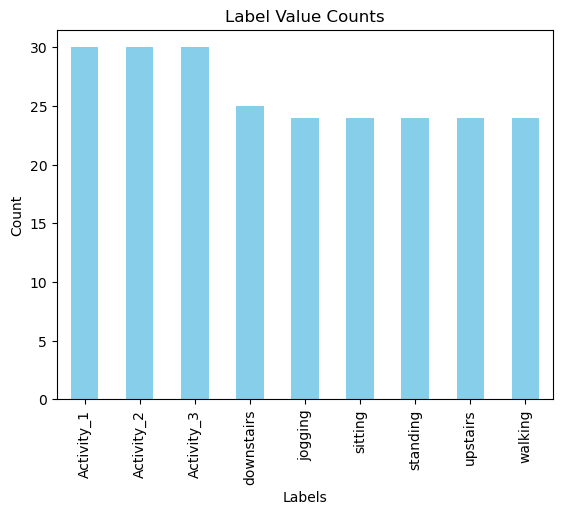

In [7]:
label_counts = df['activity'].value_counts()
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Value Counts')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [8]:
df.columns

Index(['acc_x_mean', 'acc_y_mean', 'acc_z_mean', 'acc_x_std', 'acc_y_std',
       'acc_z_std', 'acc_x_max', 'acc_y_max', 'acc_z_max', 'acc_x_min',
       'acc_y_min', 'acc_z_min', 'gyro_x_mean', 'gyro_y_mean', 'gyro_z_mean',
       'gyro_x_std', 'gyro_y_std', 'gyro_z_std', 'gyro_x_max', 'gyro_y_max',
       'gyro_z_max', 'gyro_x_min', 'gyro_y_min', 'gyro_z_min', 'activity'],
      dtype='object')

## Outliers

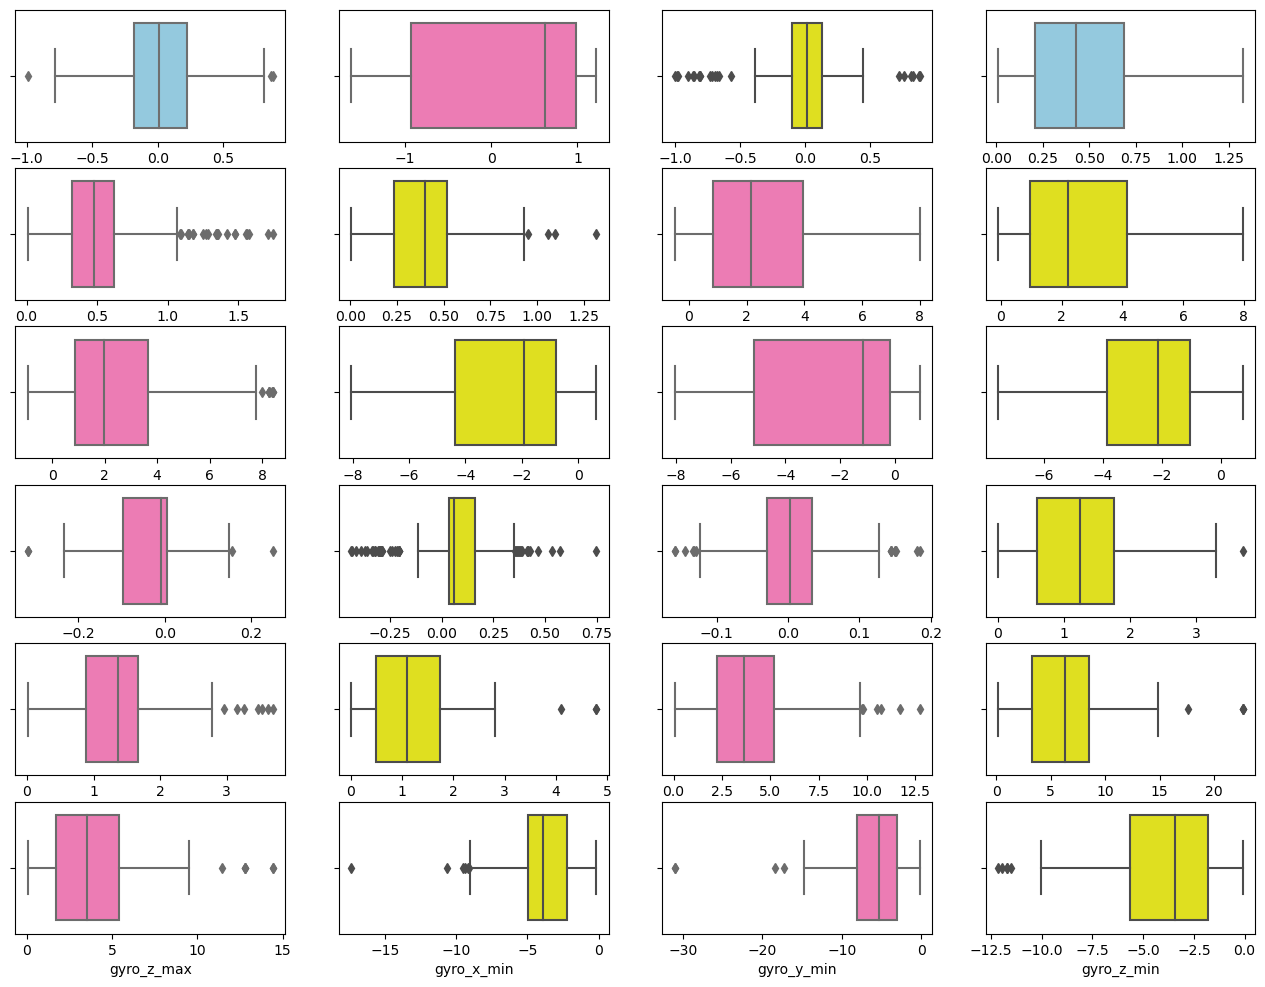

In [16]:
fig, axes = plt.subplots(6, 4, figsize=(16, 12))

sns.boxplot(data=df, x='acc_x_mean', color='skyblue', ax=axes[0,0])
sns.boxplot(data=df, x='acc_y_mean', color='hotpink', ax=axes[0,1])
sns.boxplot(data=df, x='acc_z_mean', color='yellow', ax=axes[0,2])
sns.boxplot(data=df, x='acc_x_std', color='skyblue', ax=axes[0,3])

sns.boxplot(data=df, x='acc_y_std', color='hotpink', ax=axes[1,0])
sns.boxplot(data=df, x='acc_z_std', color='yellow', ax=axes[1,1])
sns.boxplot(data=df, x='acc_x_max', color='hotpink', ax=axes[1,2])
sns.boxplot(data=df, x='acc_y_max', color='yellow', ax=axes[1,3])

sns.boxplot(data=df, x='acc_z_max', color='hotpink', ax=axes[2,0])
sns.boxplot(data=df, x='acc_x_min', color='yellow', ax=axes[2,1])
sns.boxplot(data=df, x='acc_y_min', color='hotpink', ax=axes[2,2])
sns.boxplot(data=df, x='acc_z_min', color='yellow', ax=axes[2,3])

sns.boxplot(data=df, x='gyro_x_mean', color='hotpink', ax=axes[3,0])
sns.boxplot(data=df, x='gyro_y_mean', color='yellow', ax=axes[3,1])
sns.boxplot(data=df, x='gyro_z_mean', color='hotpink', ax=axes[3,2])
sns.boxplot(data=df, x='gyro_x_std', color='yellow', ax=axes[3,3])

sns.boxplot(data=df, x='gyro_y_std', color='hotpink', ax=axes[4,0])
sns.boxplot(data=df, x='gyro_z_std', color='yellow', ax=axes[4,1])
sns.boxplot(data=df, x='gyro_x_max', color='hotpink', ax=axes[4,2])
sns.boxplot(data=df, x='gyro_y_max', color='yellow', ax=axes[4,3])

sns.boxplot(data=df, x='gyro_z_max', color='hotpink', ax=axes[5,0])
sns.boxplot(data=df, x='gyro_x_min', color='yellow', ax=axes[5,1])
sns.boxplot(data=df, x='gyro_y_min', color='hotpink', ax=axes[5,2])
sns.boxplot(data=df, x='gyro_z_min', color='yellow', ax=axes[5,3])
plt.show()

## Flux

### Activity 1, 2, 3

In [29]:
act1 = pd.read_csv("E:\\github_clone\\human-activity-recognition\\data\\custom_activity_old\\person_1\\Activity_1\\Accelerometer.csv")
act1.head()

,timestamp,timeIntervalSince1970,x,y,z
0,2023-10-28 13:08:34.387 +0000,1.698499e+09,0.074173,-0.972778,-0.001984
1,2023-10-28 13:08:34.397 +0000,1.698499e+09,0.053192,-0.978943,-0.001755
2,2023-10-28 13:08:34.407 +0000,1.698499e+09,0.062500,-0.982208,-0.000671
3,2023-10-28 13:08:34.417 +0000,1.698499e+09,0.067032,-0.982513,0.004883
4,2023-10-28 13:08:34.427 +0000,1.698499e+09,0.069168,-0.979309,0.009583


In [32]:
act1['mag'] = np.sqrt((act1['x']**2 + act1['y']**2 + act1['z']**2))

In [33]:
act1

,timestamp,timeIntervalSince1970,x,y,z,mag
0,2023-10-28 13:08:34.387 +0000,1.698499e+09,0.074173,-0.972778,-0.001984,0.975604
1,2023-10-28 13:08:34.397 +0000,1.698499e+09,0.053192,-0.978943,-0.001755,0.980389
2,2023-10-28 13:08:34.407 +0000,1.698499e+09,0.062500,-0.982208,-0.000671,0.984195
3,2023-10-28 13:08:34.417 +0000,1.698499e+09,0.067032,-0.982513,0.004883,0.984809
4,2023-10-28 13:08:34.427 +0000,1.698499e+09,0.069168,-0.979309,0.009583,0.981795
...,...,...,...,...,...,...
3858,2023-10-28 13:09:12.262 +0000,1.698499e+09,0.178497,-0.964218,0.072067,0.983245
3859,2023-10-28 13:09:12.272 +0000,1.698499e+09,0.175125,-0.961365,0.073364,0.979936
3860,2023-10-28 13:09:12.281 +0000,1.698499e+09,0.168900,-0.957291,0.075867,0.975033
3861,2023-10-28 13:09:12.291 +0000,1.698499e+09,0.173798,-0.956253,0.072876,0.974647


Text(0.5, 1.0, 'Activity 1')

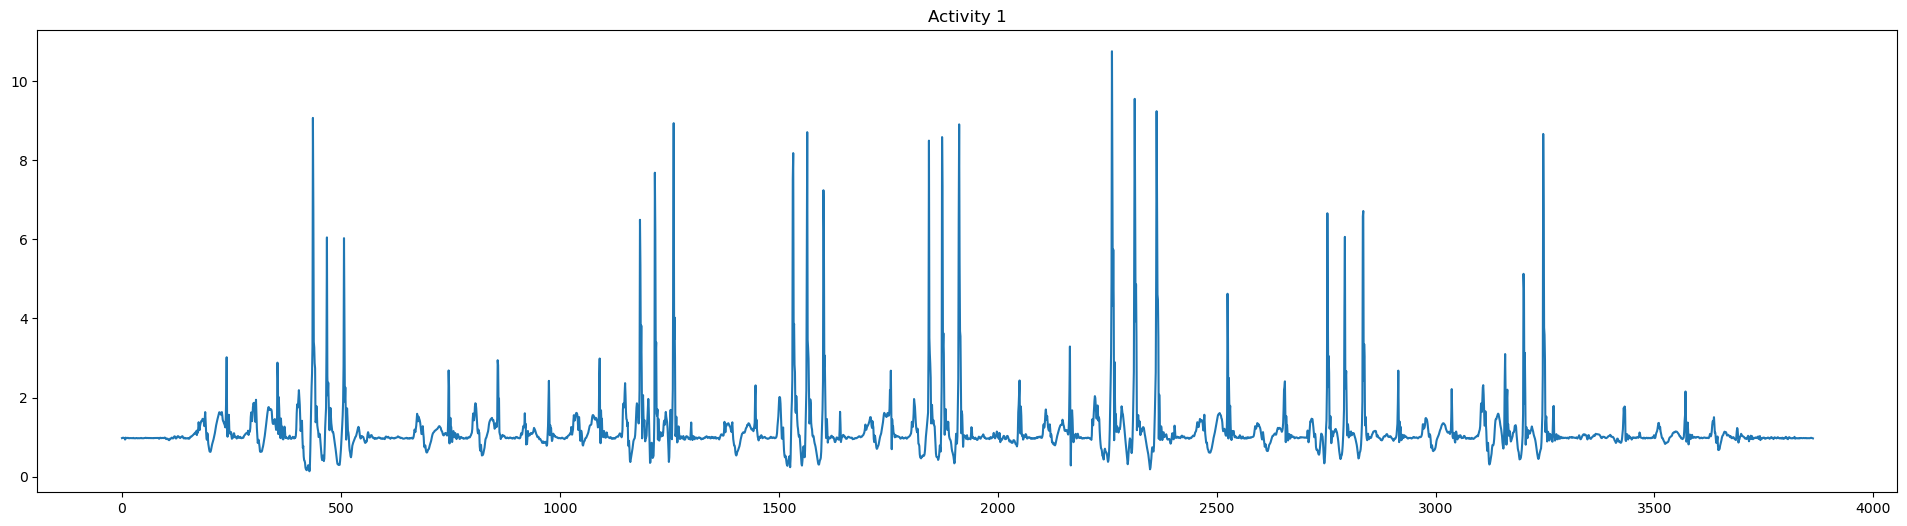

In [40]:
plt.figure(figsize=(24, 6))  # Set the figure size
plt.plot(act1.index, act1['mag'], linestyle='-')
plt.title('Activity 1')

In [55]:
def plot_flux(path, title):
    act1 = pd.read_csv(path)
    act1['mag'] = np.sqrt((act1['x']**2 + act1['y']**2 + act1['z']**2))
    plt.figure(figsize=(16, 6))  # Set the figure size
    plt.plot(act1.index, act1['mag'], linestyle='-')
    plt.title(title)

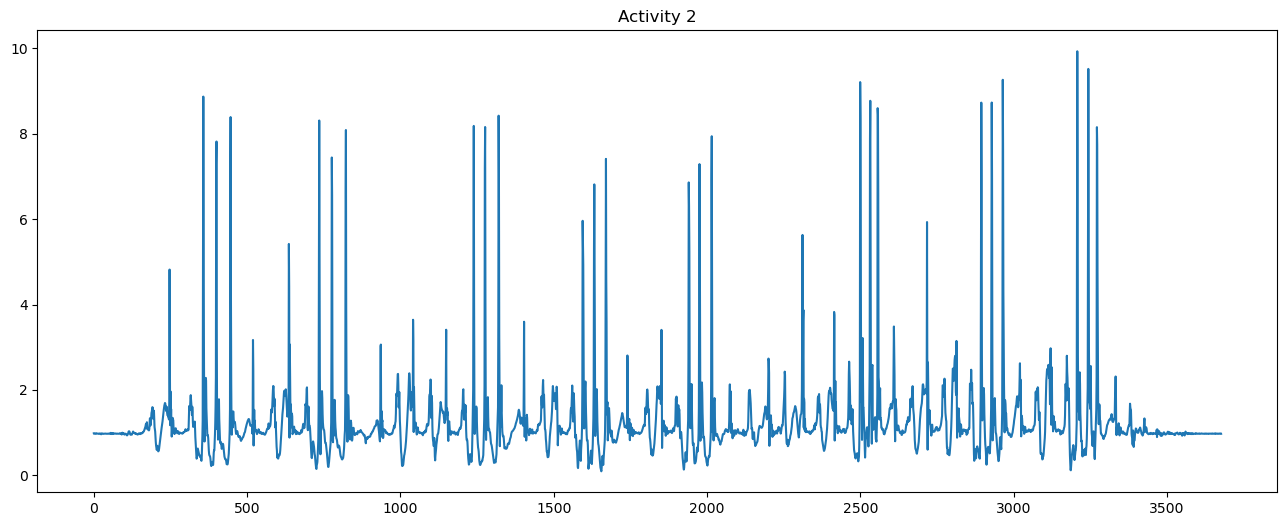

In [48]:
plot_flux("../data/custom_activity_old/person_1/Activity_2/Accelerometer.csv", "Activity 2")

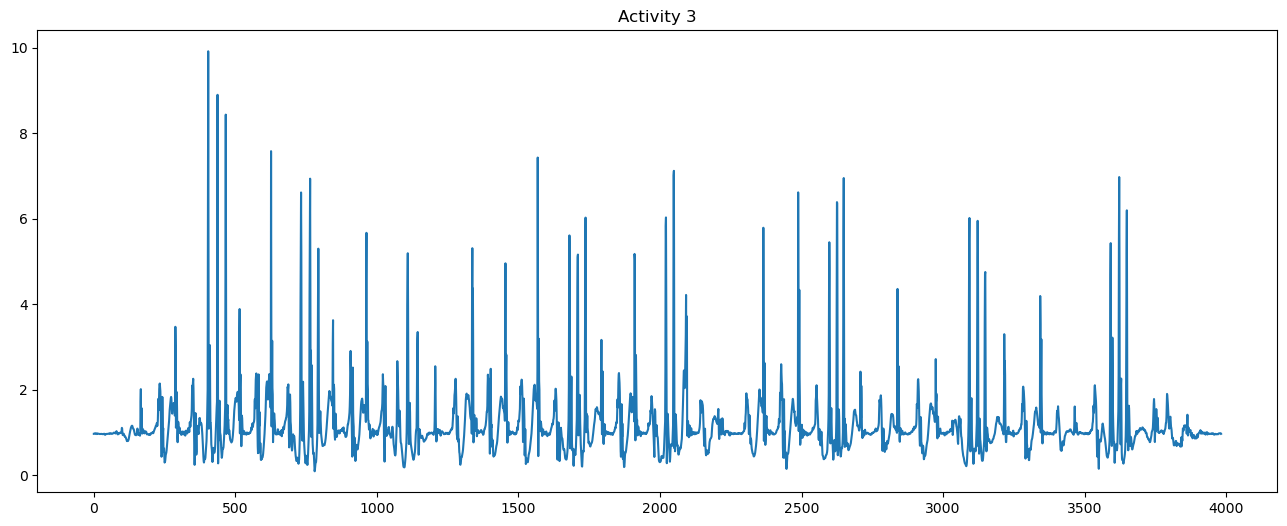

In [56]:
plot_flux("../data/custom_activity_old/person_2/Activity_3/Accelerometer.csv", "Activity 3")

In [30]:
import os
path = "E:\\github_clone\\human-activity-recognition\\data\\copy\\person_1"

In [64]:
activity = os.listdir(path)
folders = [f'{path}\\{i}\\acc.csv' for i in activity]

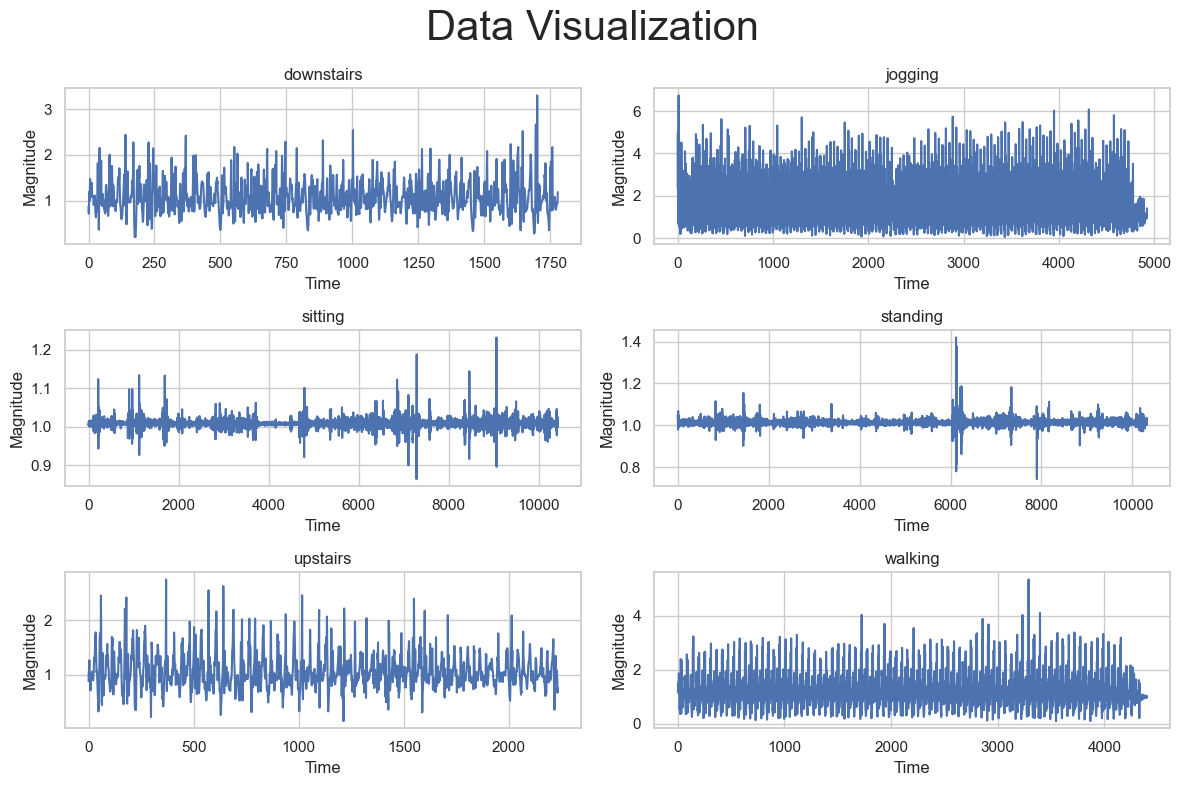

In [52]:
# Create a 3x2 grid for plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

plt.suptitle("Data Visualization", fontsize=30)
for i, file_path in enumerate(folders):
    # Read data from CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Compute the magnitude
    df['Magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    # Plot the waveplot
    row, col = i // 2, i % 2
    ax = axs[row, col]
    ax.plot(df.index, df['Magnitude'])
    ax.set_title(activity[i])
    ax.set_xlabel("Time")
    ax.set_ylabel("Magnitude")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


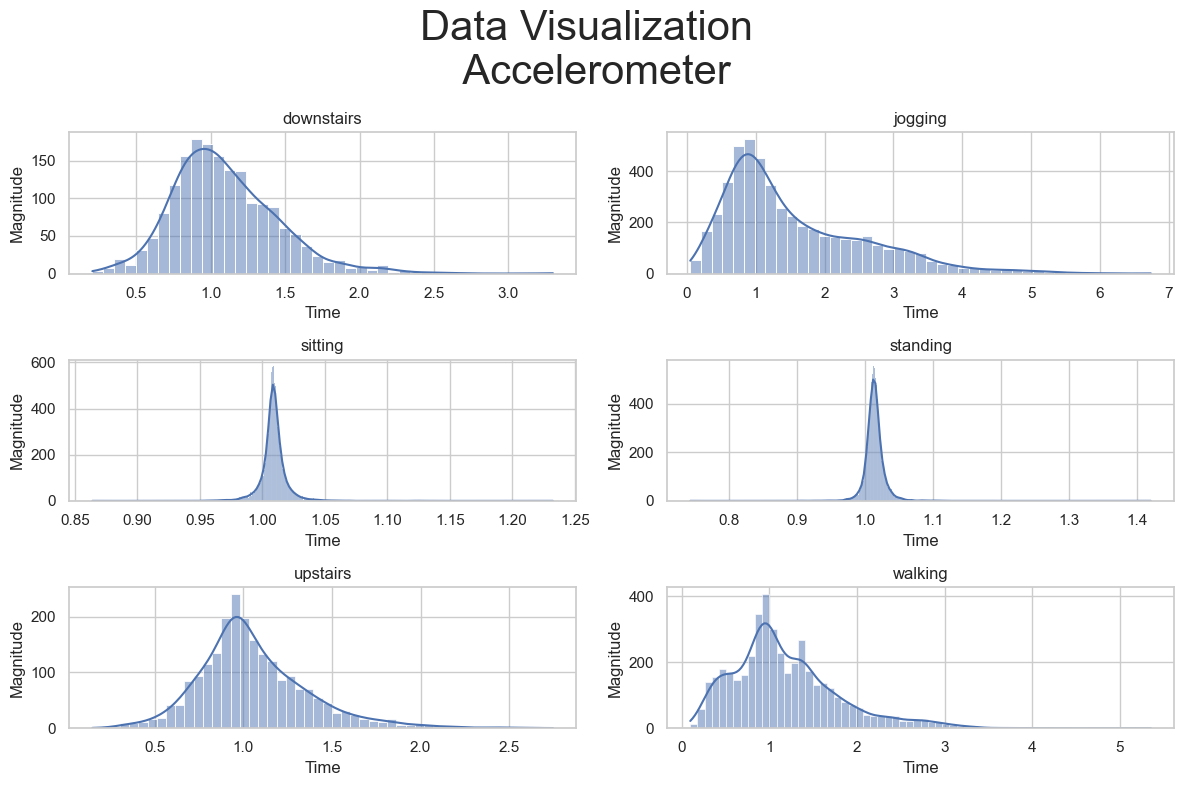

In [70]:
# Create a 3x2 grid for plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

plt.suptitle("Data Visualization \n Accelerometer", fontsize=30)
for i, file_path in enumerate(folders):
    # Read data from CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Compute the magnitude
    df['Magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    # Plot the waveplot
    row, col = i // 2, i % 2
    ax = axs[row, col]
    sns.histplot(data=df, x='Magnitude', kde=True, ax=ax)
    ax.set_title(activity[i])
    ax.set_xlabel("Time")
    ax.set_ylabel("Magnitude")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

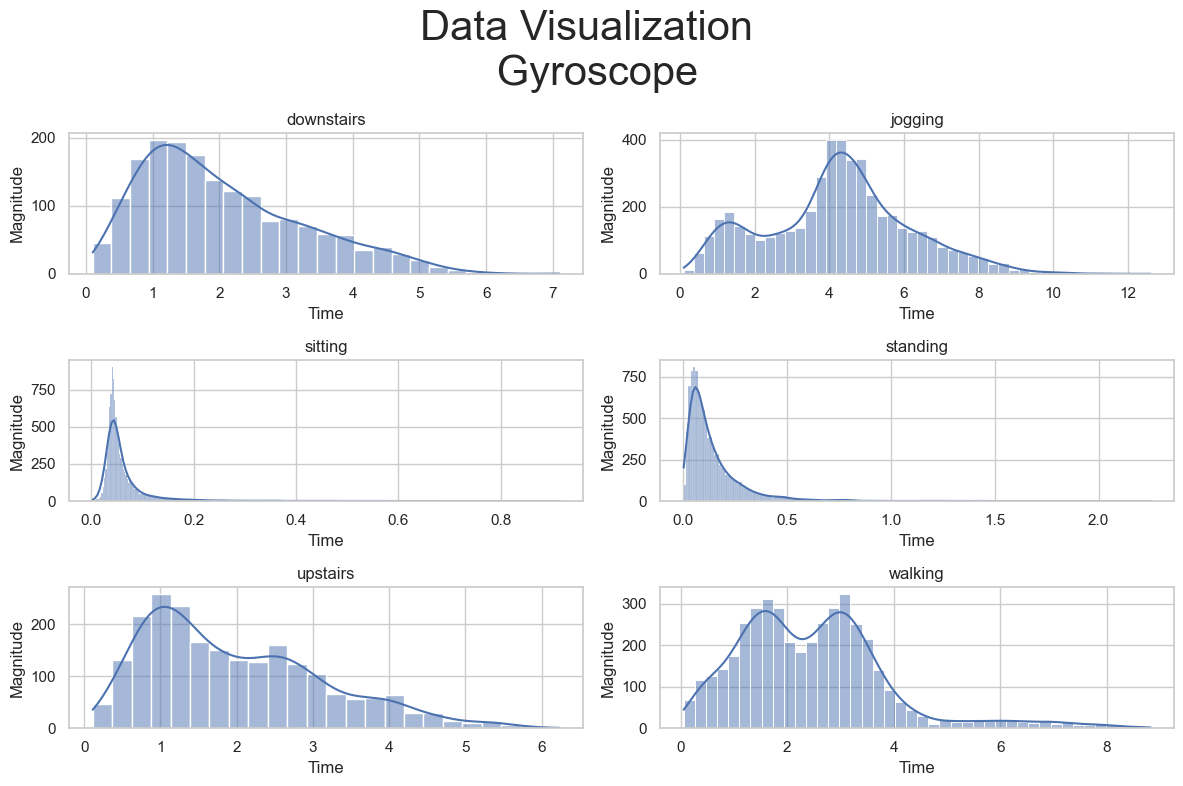

In [71]:
activity = os.listdir(path)
folders = [f'{path}\\{i}\\gyro.csv' for i in activity]

# Create a 3x2 grid for plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

plt.suptitle("Data Visualization \n Gyroscope", fontsize=30)
for i, file_path in enumerate(folders):
    # Read data from CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Compute the magnitude
    df['Magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    # Plot the waveplot
    row, col = i // 2, i % 2
    ax = axs[row, col]
    sns.histplot(data=df, x='Magnitude', kde=True, ax=ax)
    ax.set_title(activity[i])
    ax.set_xlabel("Time")
    ax.set_ylabel("Magnitude")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Data Dsitribution of accelerometer x mean of activities

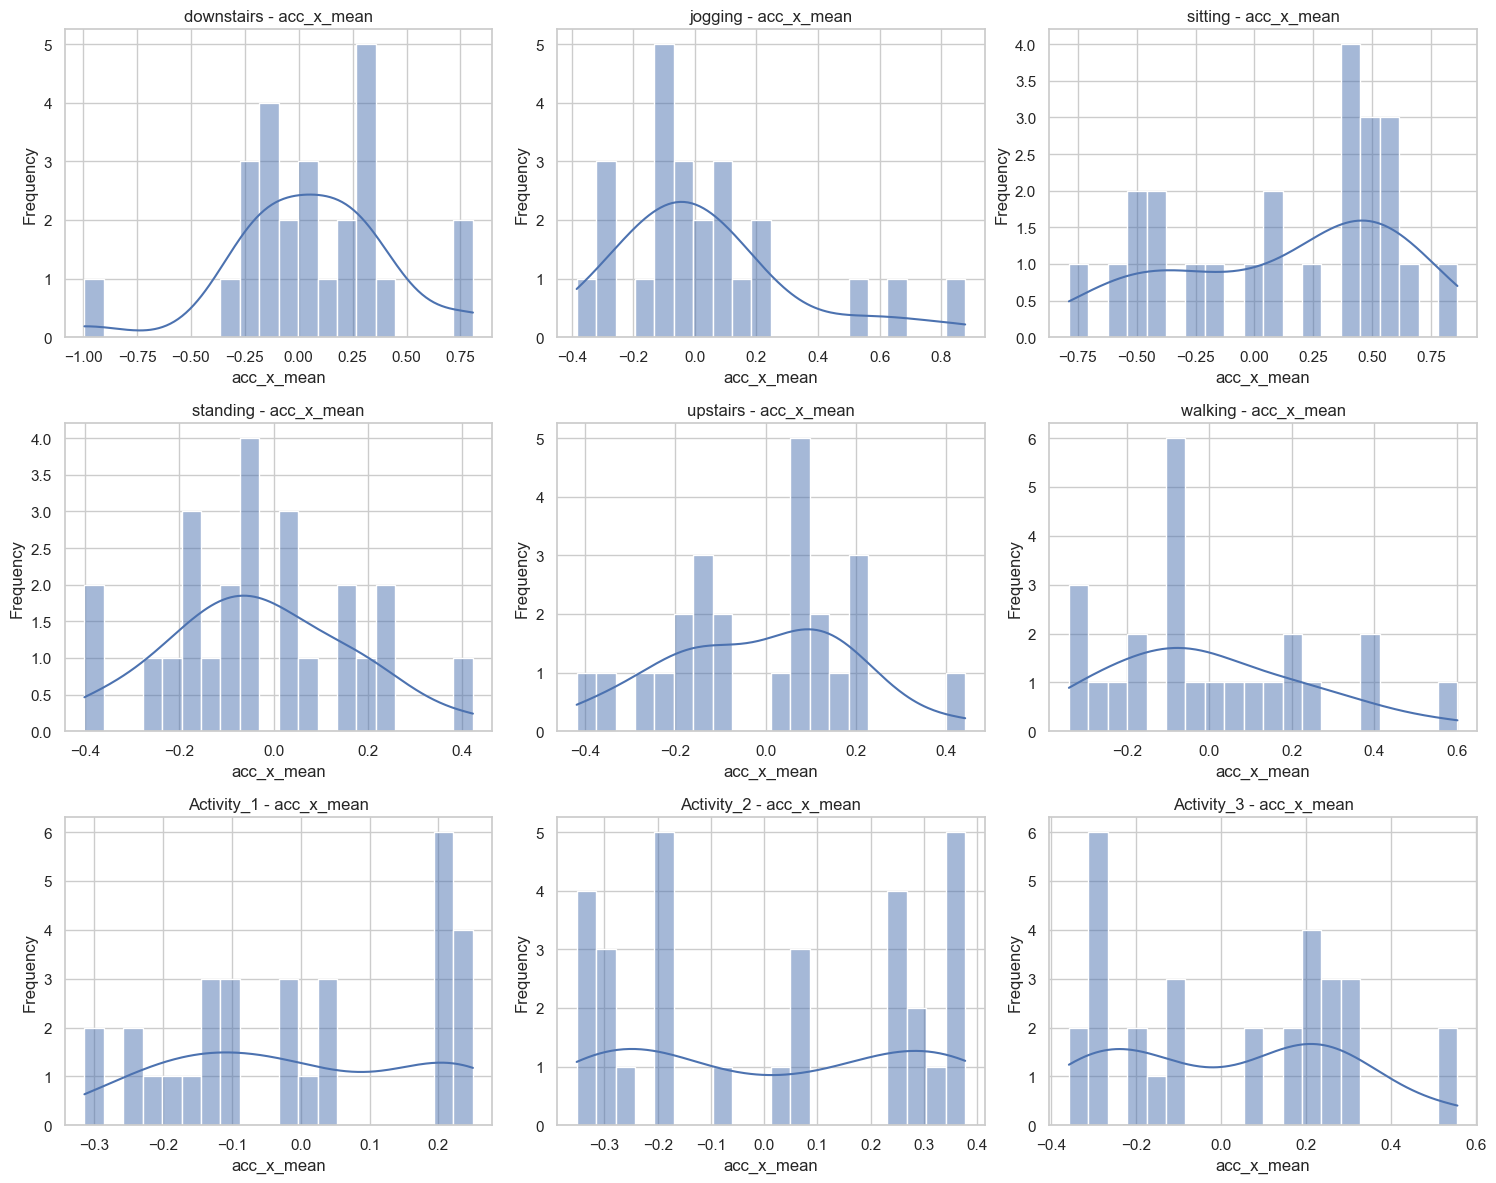

In [63]:
# List of all activities
activities = df['activity'].unique()

# number of rows and columns for subplots
num_rows = 3
num_cols = 3  # Assuming you want a 2x4 grid

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes into a 1D array for easier indexing
axes = axes.flatten()

# Loop through activities and create histplots
for i, activity in enumerate(activities):
    activity_df = df[df['activity'] == activity]
    sns.histplot(data=activity_df, x='acc_x_mean', kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'{activity} - acc_x_mean')
    axes[i].set_xlabel('acc_x_mean')
    axes[i].set_ylabel('Frequency')

# Remove any remaining empty subplots if the number of activities is less than the grid size
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

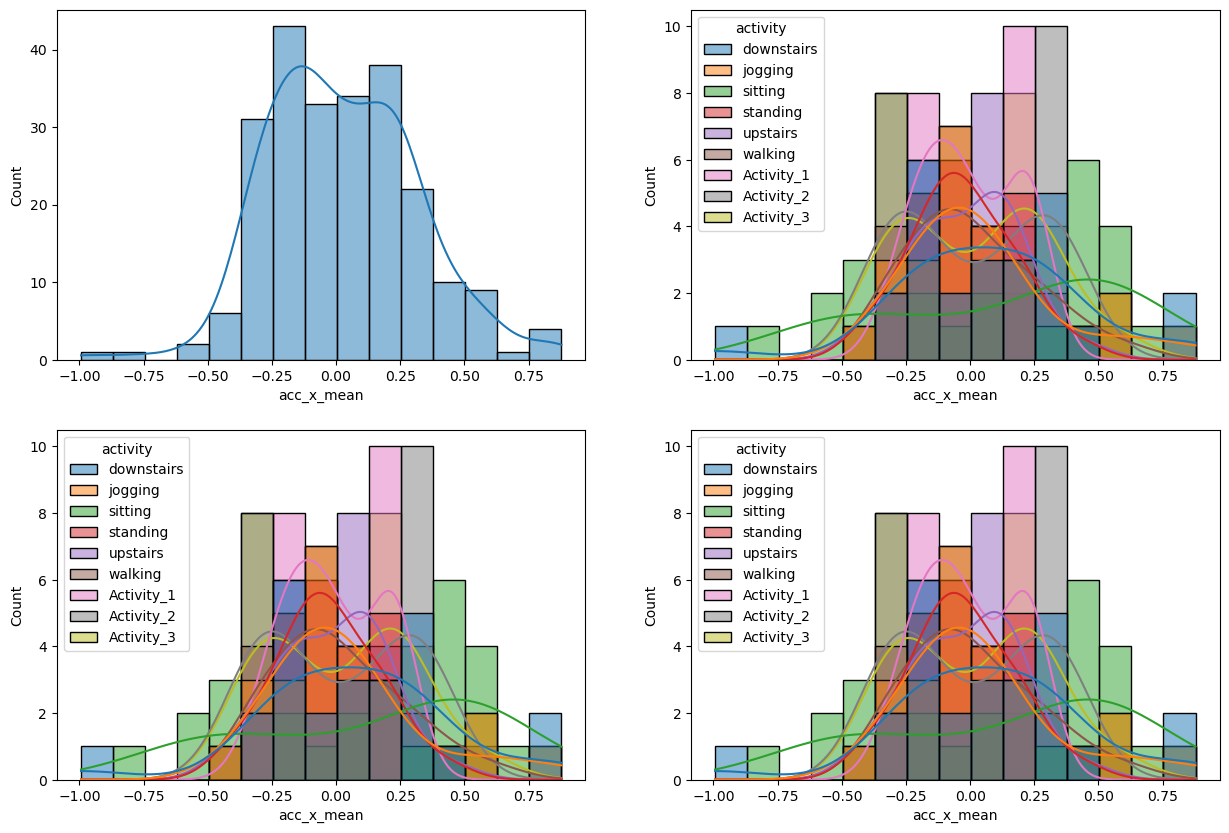

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.subplot(221)
sns.histplot(data=df, x="acc_x_mean", kde=True, )
plt.subplot(222)
sns.histplot(data=df, x="acc_x_mean", kde=True, hue='activity')
plt.subplot(223)
sns.histplot(data=df, x="acc_x_mean", kde=True, hue='activity')
plt.subplot(224)
sns.histplot(data=df, x="acc_x_mean", kde=True, hue='activity')
plt.show()